In [1]:
import numpy as np   
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digits-csv/digits_data.csv


# *READING & UNDERSTANDING DATASET*

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
dir (digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
digits.target[0]

0

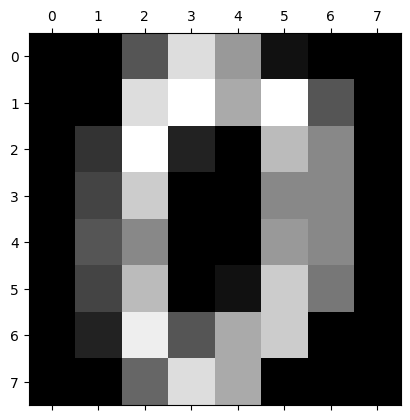

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(digits.images[0])
plt.gray()

In [8]:
X = digits.data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

# *SPLITTING DATASET*

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train

array([[ 0.,  0.,  3., ..., 13.,  4.,  0.],
       [ 0.,  0.,  9., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  6.,  0.,  0.],
       ...,
       [ 0.,  0.,  9., ..., 16.,  2.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.]])

# *SCALING THE TRAINING AND TESTING DATA*

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)

In [14]:
X_train_scaled

array([[ 0.        , -0.34169755, -0.46336049, ...,  1.05270303,
         0.45952251, -0.19710003],
       [ 0.        , -0.34169755,  0.78471641, ..., -0.64451929,
        -0.50623083, -0.19710003],
       [ 0.        , -0.34169755, -1.08739895, ..., -0.13535259,
        -0.50623083, -0.19710003],
       ...,
       [ 0.        , -0.34169755,  0.78471641, ...,  1.56186972,
        -0.02335416, -0.19710003],
       [ 0.        , -0.34169755, -0.87938613, ..., -1.15368598,
        -0.50623083, -0.19710003],
       [ 0.        , -0.34169755, -0.87938613, ..., -0.98396375,
        -0.50623083, -0.19710003]])

# *TRAINING AND TESTING THE MODEL*

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [17]:
X_test_scaled = scaler.transform(X_test)

In [18]:
print('prediction for first 5 images with its correct answers : ')
for i in range(5):
    print(f'prediction for {i} : {model.predict([X_test_scaled[i]])}')
    print(f'correct answer for {i} : {y_test[i]}')

prediction for first 5 images with its correct answers : 
prediction for 0 : [6]
correct answer for 0 : 6
prediction for 1 : [9]
correct answer for 1 : 9
prediction for 2 : [3]
correct answer for 2 : 3
prediction for 3 : [7]
correct answer for 3 : 7
prediction for 4 : [2]
correct answer for 4 : 2


In [19]:
y_pred = model.predict(X_test_scaled)
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

# *CONFUSION MATRIX ANALYSIS*

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm = confusion_matrix(y_test,y_pred)

In [22]:
import seaborn as sns

Text(0.5, 23.52222222222222, 'Predicted')

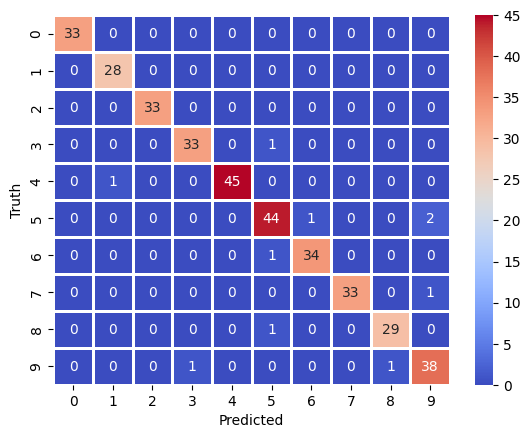

In [23]:
sns.heatmap(cm,annot = True,cmap='coolwarm',linewidths=2)
plt.ylabel('Truth')
plt.xlabel('Predicted')

# *MODEL'S ACCURACY ON TESTING DATA*

In [24]:
model.score(X_test_scaled,y_test)

0.9722222222222222